In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100% 428M/429M [00:05<00:00, 88.1MB/s]
100% 429M/429M [00:05<00:00, 84.6MB/s]


In [3]:
!kaggle datasets download -d ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 91% 409M/451M [00:00<00:00, 397MB/s]
100% 451M/451M [00:00<00:00, 477MB/s]


In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 95% 405M/428M [00:00<00:00, 436MB/s]
100% 428M/428M [00:00<00:00, 503MB/s]


In [5]:
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
  0% 0.00/107M [00:00<?, ?B/s]
100% 107M/107M [00:00<00:00, 1.45GB/s]


In [6]:
!unzip -q ravdess-emotional-speech-audio.zip -d ravdess
!unzip -q cremad.zip -d crema
!unzip -q toronto-emotional-speech-set-tess.zip -d tess
!unzip -q surrey-audiovisual-expressed-emotion-savee.zip -d savee

## Rawdess

In [7]:
import os
import pandas as pd

emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

file_paths = []
emotions = []

data_dir = "ravdess"

for actor_folder in os.listdir(data_dir):
    actor_path = os.path.join(data_dir, actor_folder)
    for file in os.listdir(actor_path):
        if file.endswith(".wav"):
            emotion_code = file.split("-")[2]
            file_paths.append(os.path.join(actor_path, file))
            emotions.append(emotion_map[emotion_code])

In [8]:
file_paths[0:5]

['ravdess/Actor_24/03-01-03-02-01-02-24.wav',
 'ravdess/Actor_24/03-01-04-02-02-02-24.wav',
 'ravdess/Actor_24/03-01-06-01-01-01-24.wav',
 'ravdess/Actor_24/03-01-02-02-01-02-24.wav',
 'ravdess/Actor_24/03-01-07-01-01-02-24.wav']

In [9]:
emotions[0:5]

['happy', 'sad', 'fearful', 'calm', 'disgust']

In [10]:
ravdess_df = pd.DataFrame({
    "path": file_paths,
    "emotion": emotions
})

ravdess_df.head()

path  emotion
0  ravdess/Actor_24/03-01-03-02-01-02-24.wav    happy
1  ravdess/Actor_24/03-01-04-02-02-02-24.wav      sad
2  ravdess/Actor_24/03-01-06-01-01-01-24.wav  fearful
3  ravdess/Actor_24/03-01-02-02-01-02-24.wav     calm
4  ravdess/Actor_24/03-01-07-01-01-02-24.wav  disgust

## Crema

In [11]:
crema_dir = "crema/AudioWAV"
crema_paths = []
crema_emotions = []

crema_emotion_map = {
    'NEU': 'neutral',
    'HAP': 'happy',
    'SAD': 'sad',
    'ANG': 'angry',
    'FEA': 'fearful',
    'DIS': 'disgust'
}

for file in os.listdir(crema_dir):
    if file.endswith(".wav"):
        parts = file.split('_')
        if len(parts) >= 3:
            emotion_code = parts[2]
            emotion_code = emotion_code.strip().upper()
            if emotion_code in crema_emotion_map:
                crema_paths.append(os.path.join(crema_dir, file))
                crema_emotions.append(crema_emotion_map[emotion_code])

In [12]:
crema_df = pd.DataFrame({
    "path": crema_paths,
    "emotion": crema_emotions
})

crema_df.head()

path  emotion
0  crema/AudioWAV/1060_TSI_FEA_XX.wav  fearful
1  crema/AudioWAV/1029_ITS_HAP_XX.wav    happy
2  crema/AudioWAV/1034_TSI_FEA_XX.wav  fearful
3  crema/AudioWAV/1011_DFA_DIS_XX.wav  disgust
4  crema/AudioWAV/1051_TAI_ANG_XX.wav    angry

## Tees

In [13]:
tess_dir = "/content/tess/TESS Toronto emotional speech set data"
tess_paths = []
tess_emotions = []

for folder in os.listdir(tess_dir):
    folder_path = os.path.join(tess_dir, folder)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            for emotion in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'surprise']:
                if emotion in file.lower():
                    # 'ps' in TESS actually means 'pleasant surprise' → standardize to 'surprised'
                    mapped_emotion = 'surprised' if emotion in ['ps', 'surprise'] else emotion
                    tess_paths.append(file_path)
                    tess_emotions.append(mapped_emotion)
                    break

In [14]:
tess_df = pd.DataFrame({
    "path": tess_paths,
    "emotion": tess_emotions
})

tess_df.head()

path emotion
0  /content/tess/TESS Toronto emotional speech se...     sad
1  /content/tess/TESS Toronto emotional speech se...     sad
2  /content/tess/TESS Toronto emotional speech se...     sad
3  /content/tess/TESS Toronto emotional speech se...     sad
4  /content/tess/TESS Toronto emotional speech se...     sad

## Savee

In [15]:
savee_dir = "//content/savee/ALL"
savee_paths = []
savee_emotions = []

savee_emotion_map = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fearful',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad',
    'su': 'surprised'
}

for file in os.listdir(savee_dir):
    if file.endswith(".wav"):
        # Extract emotion code from filename like "DC_a01.wav"
        base_name = file.split('_')[1]
        emotion_prefix = base_name[:2] if base_name.startswith(('sa', 'su')) else base_name[0]
        if emotion_prefix in savee_emotion_map:
            savee_paths.append(os.path.join(savee_dir, file))
            savee_emotions.append(savee_emotion_map[emotion_prefix])

In [16]:
savee_df = pd.DataFrame({
    "path": savee_paths,
    "emotion": savee_emotions
})

savee_df.head()

path    emotion
0   //content/savee/ALL/JK_d09.wav    disgust
1   //content/savee/ALL/DC_a08.wav      angry
2  //content/savee/ALL/JK_su13.wav  surprised
3   //content/savee/ALL/JK_d06.wav    disgust
4  //content/savee/ALL/JK_su05.wav  surprised

In [17]:
combined_df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], ignore_index=True)
combined_df.head()

path  emotion
0  ravdess/Actor_24/03-01-03-02-01-02-24.wav    happy
1  ravdess/Actor_24/03-01-04-02-02-02-24.wav      sad
2  ravdess/Actor_24/03-01-06-01-01-01-24.wav  fearful
3  ravdess/Actor_24/03-01-02-02-01-02-24.wav     calm
4  ravdess/Actor_24/03-01-07-01-01-02-24.wav  disgust

In [18]:
combined_df['emotion'] = combined_df['emotion'].replace({
    'fearful': 'fear'
})

In [19]:
combined_df['emotion'].value_counts()

emotion
happy        1923
sad          1923
fear         1923
disgust      1923
angry        1923
neutral      1703
surprised     652
calm          192
Name: count, dtype: int64

## Data Visualization

<ipython-input-20-3507072374>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["emotion"], order=combined_df["emotion"].value_counts().index, palette="Set2")


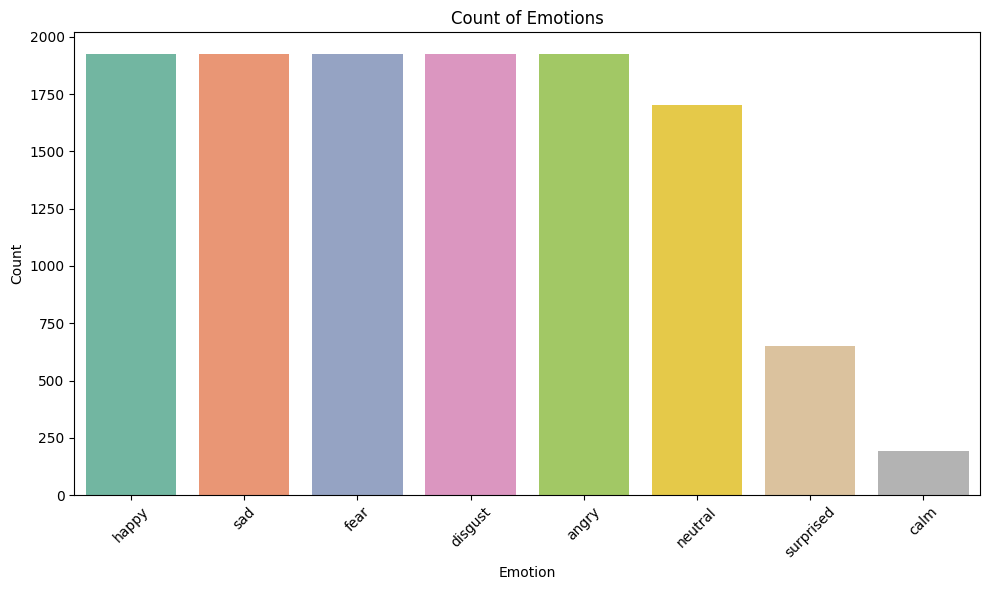

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x=combined_df["emotion"], order=combined_df["emotion"].value_counts().index, palette="Set2")
plt.title("Count of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
from IPython.display import Audio, display
import librosa
import librosa.display
import numpy as np

def plot_waveform_spectrogram_with_audio(file_path, emotion_label=None):

    y, sr = librosa.load(file_path)

    plt.figure(figsize=(14, 6))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    title = "Waveform"
    if emotion_label:
        title += f" of: {emotion_label}"
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # Spectrogram
    plt.subplot(1, 2, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Mel Spectrogram")
    plt.tight_layout()
    plt.show()

    display(Audio(y, rate=sr))
    print(f"Playing audio: {file_path}")

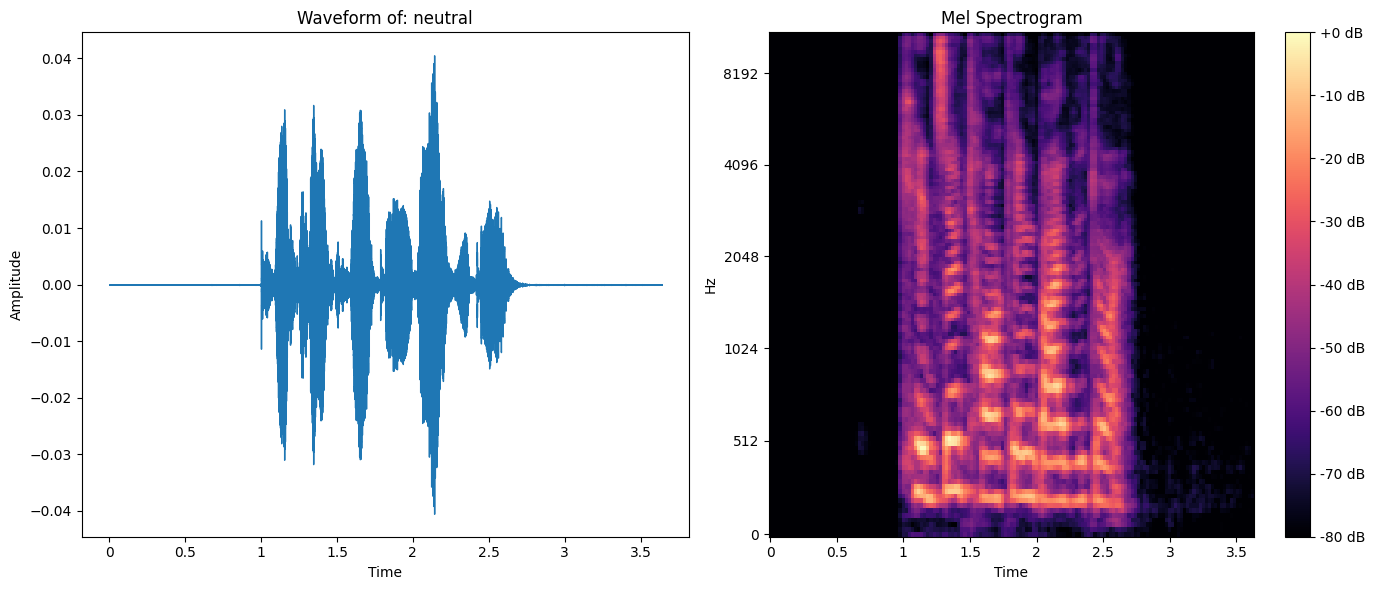

Playing audio: ravdess/Actor_24/03-01-01-01-01-02-24.wav


In [22]:
sample_path = combined_df[combined_df["emotion"] == "neutral"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="neutral")

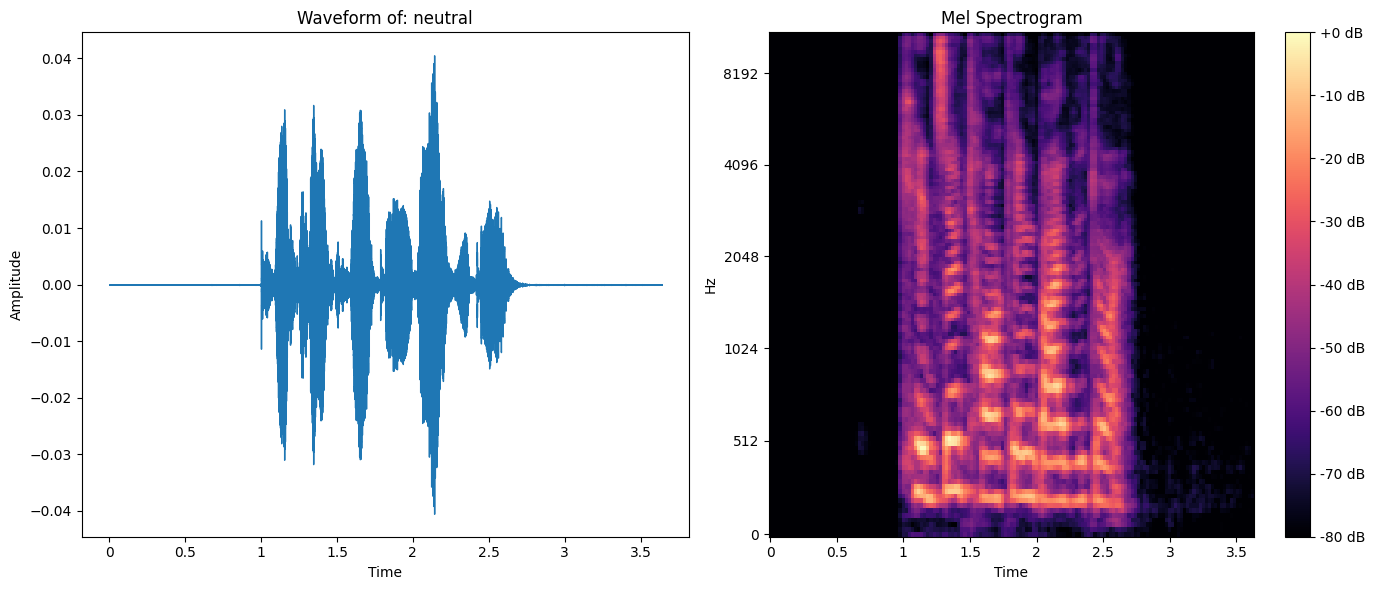

Playing audio: ravdess/Actor_24/03-01-01-01-01-02-24.wav


In [23]:
sample_path = combined_df[combined_df["emotion"] == "neutral"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="neutral")

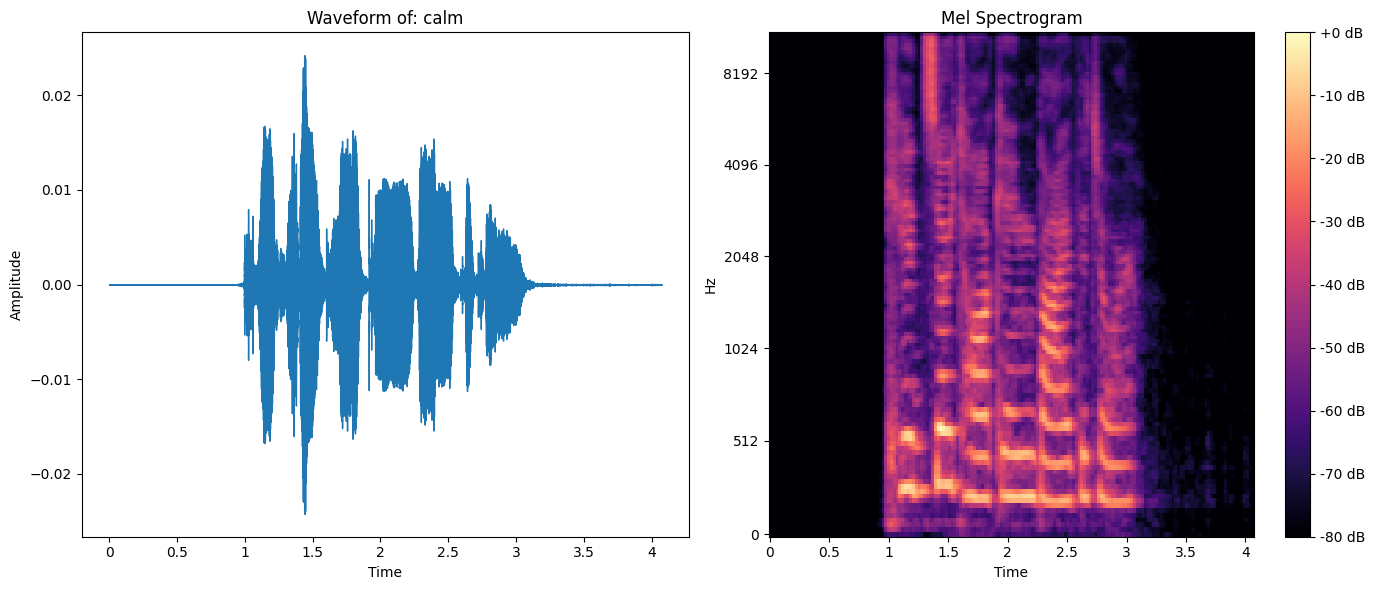

Playing audio: ravdess/Actor_24/03-01-02-02-01-02-24.wav


In [24]:
sample_path = combined_df[combined_df["emotion"] == "calm"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="calm")

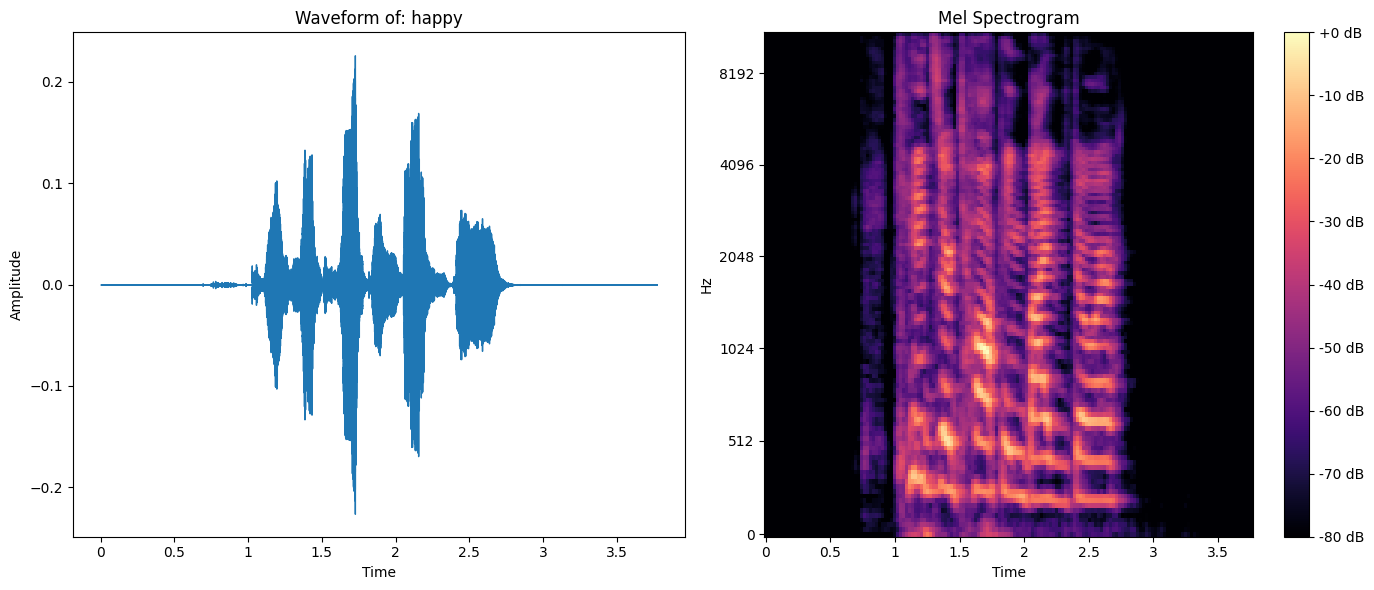

Playing audio: ravdess/Actor_24/03-01-03-02-01-02-24.wav


In [25]:
sample_path = combined_df[combined_df["emotion"] == "happy"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="happy")

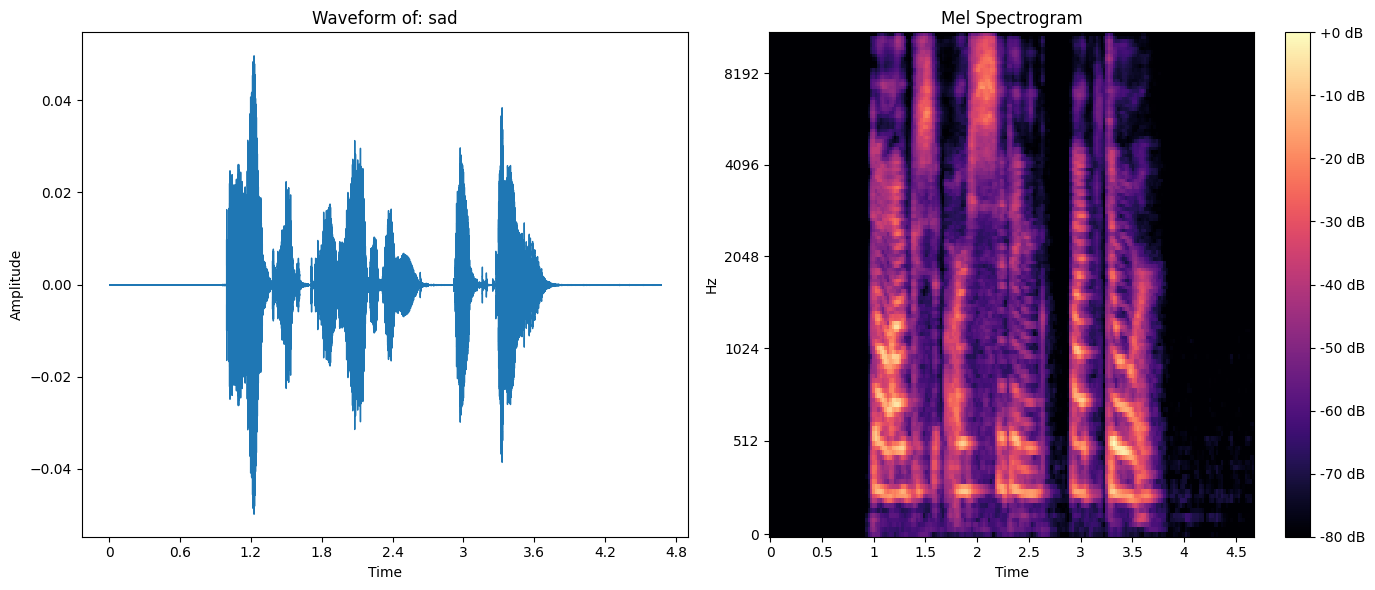

Playing audio: ravdess/Actor_24/03-01-04-02-02-02-24.wav


In [26]:
sample_path = combined_df[combined_df["emotion"] == "sad"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="sad")

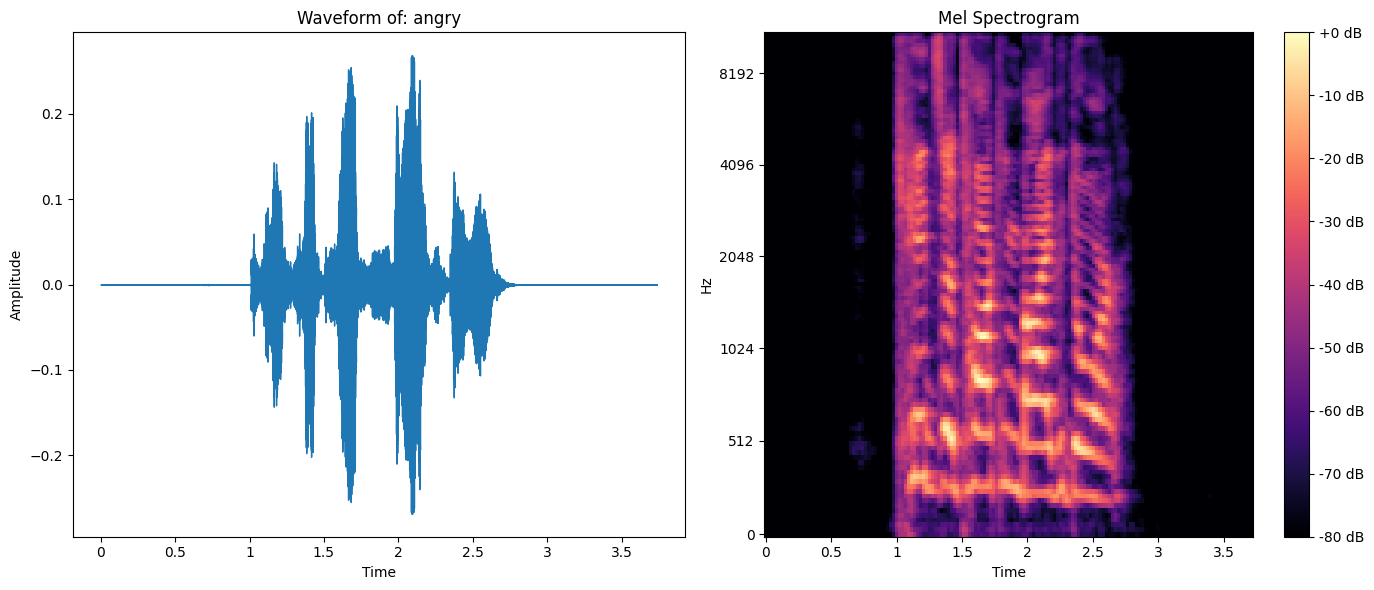

Playing audio: ravdess/Actor_24/03-01-05-01-01-02-24.wav


In [27]:
sample_path = combined_df[combined_df["emotion"] == "angry"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="angry")

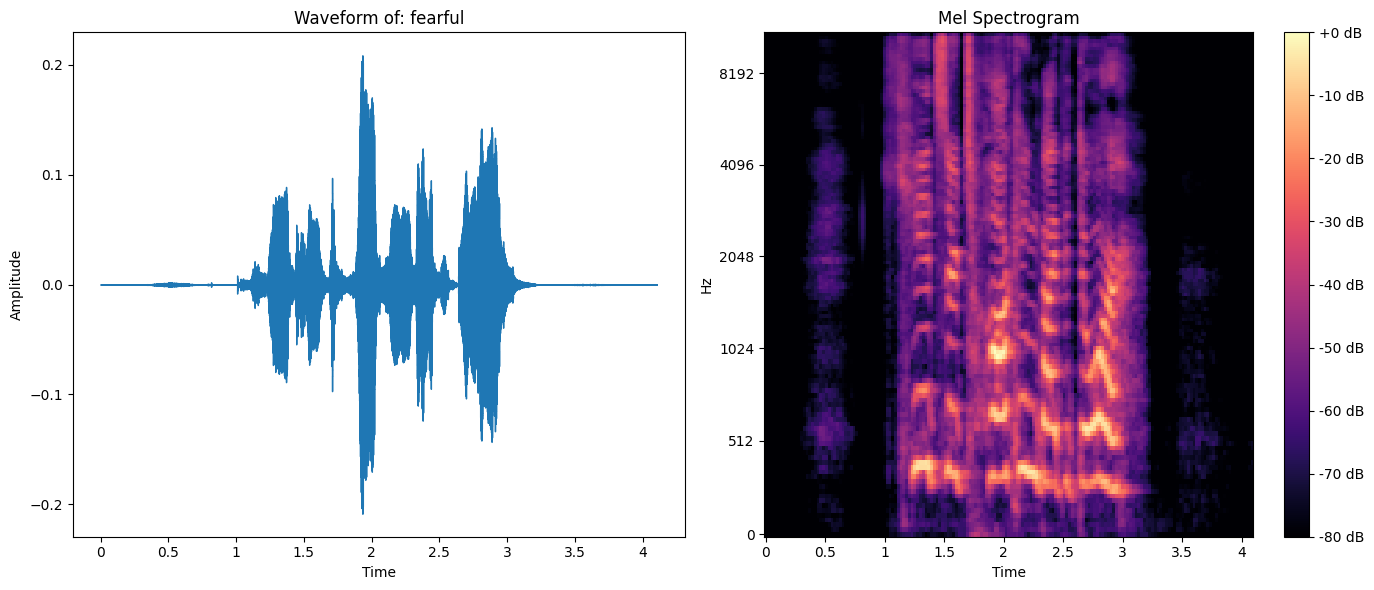

Playing audio: ravdess/Actor_24/03-01-06-01-01-01-24.wav


In [28]:
sample_path = combined_df[combined_df["emotion"] == "fear"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="fearful")

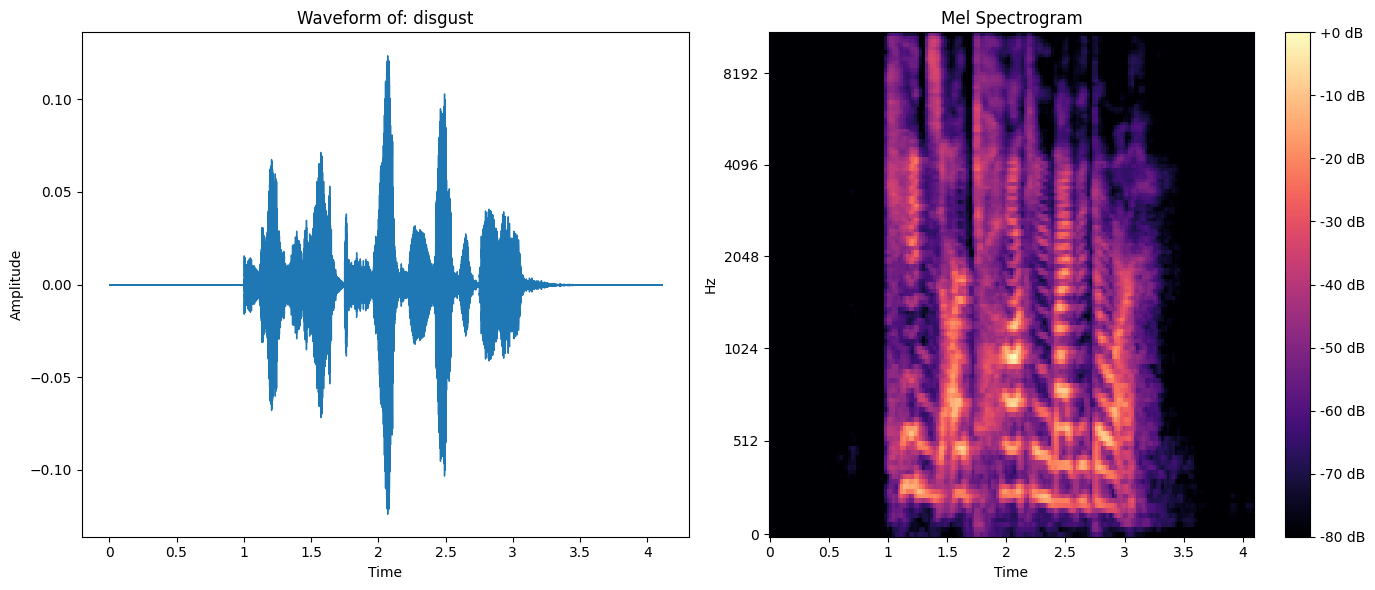

Playing audio: ravdess/Actor_24/03-01-07-01-01-02-24.wav


In [29]:
sample_path = combined_df[combined_df["emotion"] == "disgust"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="disgust")

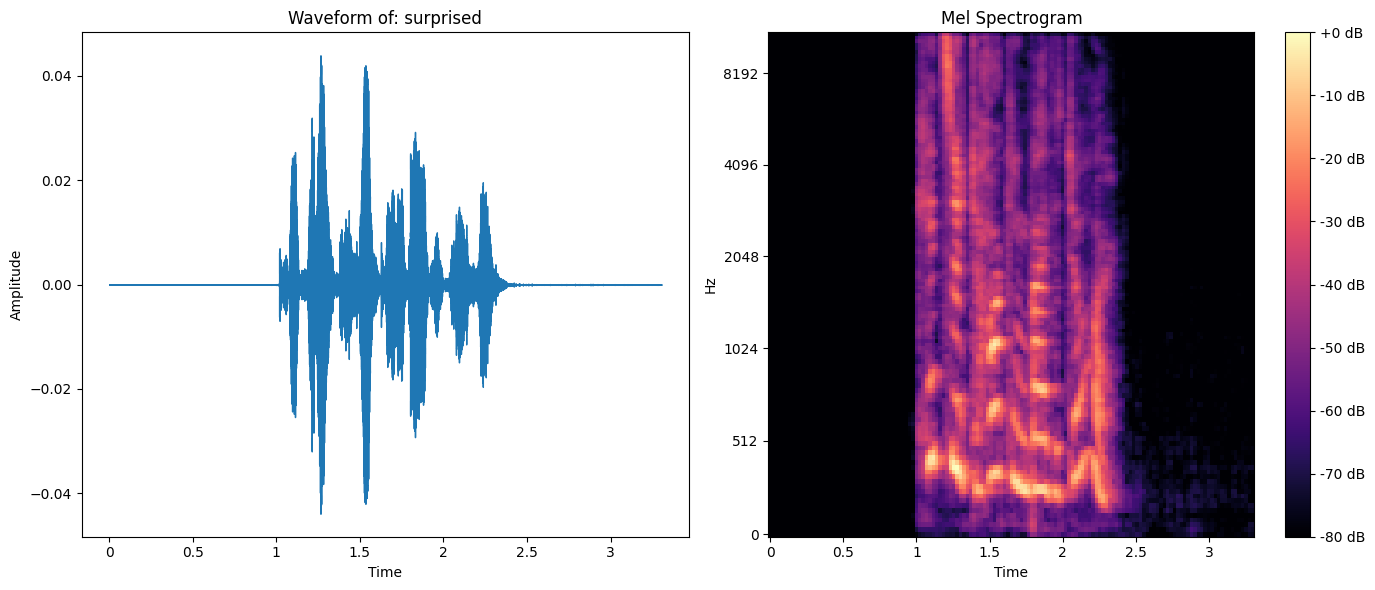

Playing audio: ravdess/Actor_24/03-01-08-01-01-01-24.wav


In [30]:
sample_path = combined_df[combined_df["emotion"] == "surprised"].iloc[0]["path"]
plot_waveform_spectrogram_with_audio(sample_path, emotion_label="surprised")

 **@dropping calm because it has very less number of data**

In [31]:
combined_df = combined_df[combined_df['emotion'] != 'calm']

In [32]:
combined_df['emotion'].value_counts()

emotion
happy        1923
sad          1923
fear         1923
disgust      1923
angry        1923
neutral      1703
surprised     652
Name: count, dtype: int64

## Data Augmentation

In [33]:
# 1. Add Noise
def add_noise(data, noise_level=0.005):
    noise = np.random.randn(len(data))
    return data + noise_level * noise

# 2. Time Stretch
def stretch_fixed(y, rate=1.1, hop_length=512):
    # STFT
    D = librosa.stft(y, hop_length=hop_length)

    # Time-stretch
    D_stretch = librosa.phase_vocoder(D, rate=rate, hop_length=hop_length)

    # Inverse STFT
    y_stretch = librosa.istft(D_stretch, hop_length=hop_length)

    # Fix length to match original
    return librosa.util.fix_length(y_stretch, size=len(y))

# 3. Pitch Shift
def shift(data, sr, n_steps=2):
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)

normal audio

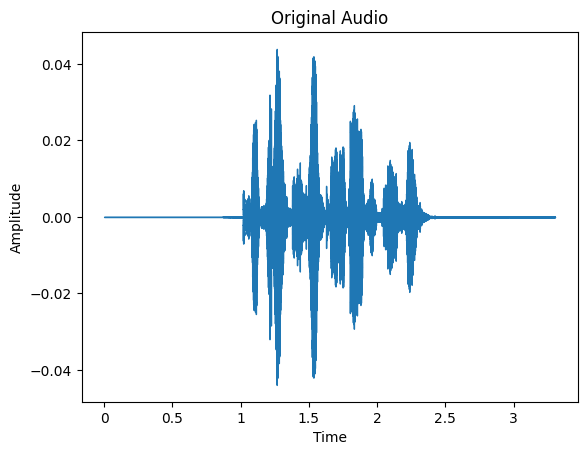

In [34]:
neutral_sample_path = combined_df[combined_df['emotion'] == 'surprised'].iloc[0]['path']
data, sample_rate = librosa.load(neutral_sample_path)

librosa.display.waveshow(data, sr=sample_rate)
plt.title("Original Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

display(Audio(data, rate=sample_rate))

noise injection

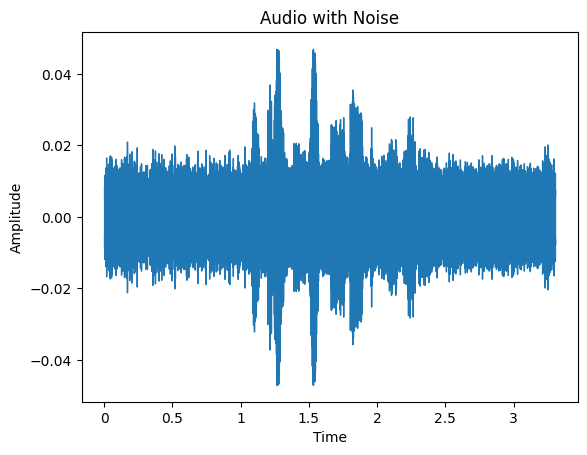

In [35]:
x = add_noise(data)

librosa.display.waveshow(x, sr=sample_rate)
plt.title("Audio with Noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

display(Audio(x, rate=sample_rate))

stretching

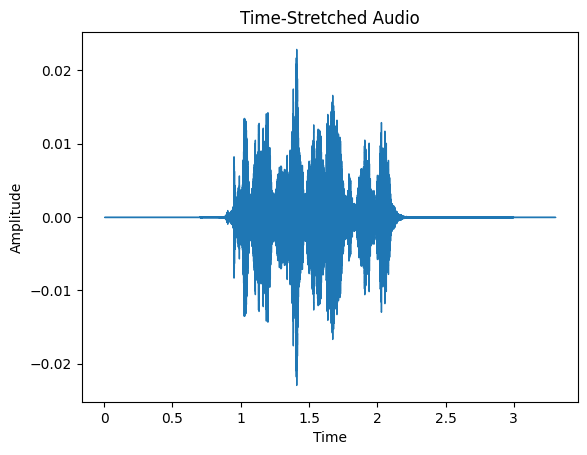

In [36]:
x_stretch = stretch_fixed(data)

librosa.display.waveshow(x_stretch, sr=sample_rate)
plt.title("Time-Stretched Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

display(Audio(x_stretch, rate=sample_rate))

pitch shifting

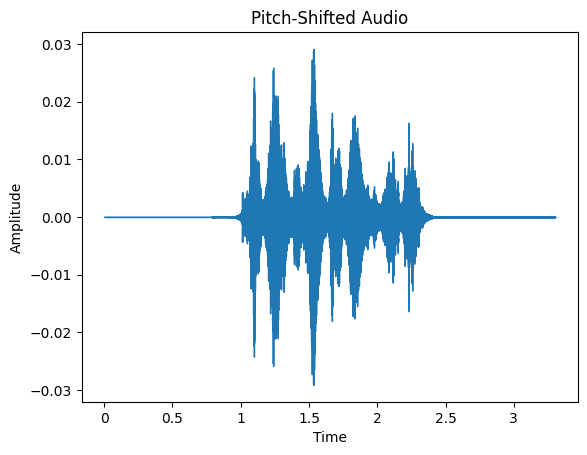

In [37]:
x = shift(data, sample_rate, n_steps=2)

librosa.display.waveshow(x, sr=sample_rate)
plt.title("Pitch-Shifted Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

display(Audio(x, rate=sample_rate))

performing data augmentation on surprised class

In [38]:
surprised_df = combined_df[combined_df["emotion"] == "surprised"]
surprised_df.head()

path    emotion
7   ravdess/Actor_24/03-01-08-01-01-01-24.wav  surprised
19  ravdess/Actor_24/03-01-08-02-02-02-24.wav  surprised
25  ravdess/Actor_24/03-01-08-02-01-02-24.wav  surprised
34  ravdess/Actor_24/03-01-08-01-02-01-24.wav  surprised
42  ravdess/Actor_24/03-01-08-02-02-01-24.wav  surprised

In [39]:
import random

def augment_audio(path, sr=22050):
    y, _ = librosa.load(path, sr=sr)

    choice = random.choice(["stretch", "pitch", "noise"])

    if choice == "stretch":
        y_aug = stretch_fixed(y, rate=np.random.uniform(0.8, 1.2))
    elif choice == "pitch":
        y_aug = shift(y, sr=sr, n_steps=random.randint(-2, 2))
    else:
        y_aug = add_noise(y)

    return [y_aug]

In [40]:
import soundfile as sf
import os
from tqdm import tqdm

os.makedirs("augmented_data", exist_ok=True)

aug_paths = []
aug_labels = []

augmentations_per_sample = 2

for idx, row in tqdm(surprised_df.iterrows(), total=len(surprised_df)):
    for i in range(augmentations_per_sample):
        aug_audios = augment_audio(row["path"])  # returns a list of 1 audio

        for j, aug in enumerate(aug_audios):
            save_path = f"augmented_data/surprised_aug_{idx}_{i}_{j}.wav"
            sf.write(save_path, aug, samplerate=22050)
            aug_paths.append(save_path)
            aug_labels.append("surprised")


100%|██████████| 652/652 [00:30<00:00, 21.40it/s]


In [41]:
len(aug_labels)

1304

In [42]:
aug_df = pd.DataFrame({
    "path": aug_paths,
    "emotion": aug_labels
})

aug_df.head()

path    emotion
0   augmented_data/surprised_aug_7_0_0.wav  surprised
1   augmented_data/surprised_aug_7_1_0.wav  surprised
2  augmented_data/surprised_aug_19_0_0.wav  surprised
3  augmented_data/surprised_aug_19_1_0.wav  surprised
4  augmented_data/surprised_aug_25_0_0.wav  surprised

In [43]:
combined_df = pd.concat([combined_df, aug_df], ignore_index=True)
combined_df.head()

path  emotion
0  ravdess/Actor_24/03-01-03-02-01-02-24.wav    happy
1  ravdess/Actor_24/03-01-04-02-02-02-24.wav      sad
2  ravdess/Actor_24/03-01-06-01-01-01-24.wav     fear
3  ravdess/Actor_24/03-01-07-01-01-02-24.wav  disgust
4  ravdess/Actor_24/03-01-03-02-02-02-24.wav    happy

In [44]:
# shuffle the dataframe
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

<ipython-input-45-3464434254>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_df["emotion"], order=combined_df["emotion"].value_counts().index, palette="Set2")


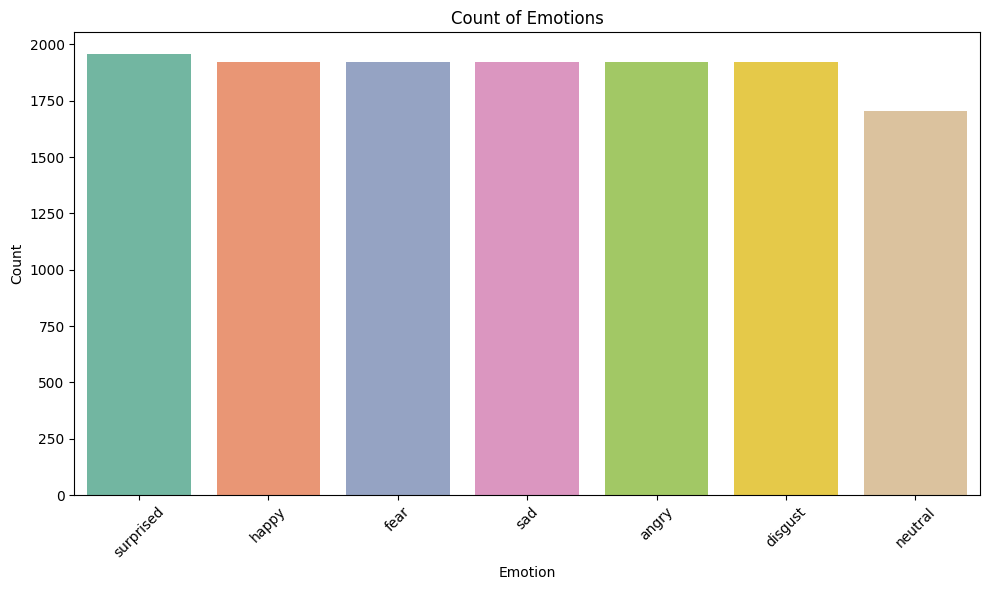

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x=combined_df["emotion"], order=combined_df["emotion"].value_counts().index, palette="Set2")
plt.title("Count of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
combined_df['emotion'].value_counts()

emotion
surprised    1956
happy        1923
fear         1923
sad          1923
angry        1923
disgust      1923
neutral      1703
Name: count, dtype: int64

## Feature Extraction

In [47]:
import numpy as np
import librosa
import warnings

def extract_all_features(file_path, sr=22050, n_mfcc=40, max_len=300):
    try:
        y, _ = librosa.load(file_path, sr=sr)

        # Skip empty or silent audio
        if y is None or len(y) < 2048 or np.max(np.abs(y)) < 1e-4:
            print(f"Skipped invalid or silent file: {file_path}")
            return np.zeros((max_len, n_mfcc + 12 + 1 + 1))

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)

            # Feature extraction
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T
            chroma = librosa.feature.chroma_stft(y=y, sr=sr).T
            zcr = librosa.feature.zero_crossing_rate(y).T
            rms = librosa.feature.rms(y=y).T

        # Make sure all features have the same time steps
        min_len = min(len(mfccs), len(chroma), len(zcr), len(rms))
        mfccs = mfccs[:min_len]
        chroma = chroma[:min_len]
        zcr = zcr[:min_len]
        rms = rms[:min_len]

        combined = np.hstack([mfccs, chroma, zcr, rms])

        # Pad or truncate to fixed length
        if combined.shape[0] < max_len:
            pad_width = max_len - combined.shape[0]
            combined = np.pad(combined, ((0, pad_width), (0, 0)), mode='constant')
        else:
            combined = combined[:max_len]

        return combined

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return np.zeros((max_len, n_mfcc + 12 + 1 + 1))  # Return zero-padded sequence


In [48]:
all_audio_files = []
all_audio_files = list(zip(combined_df["path"], combined_df["emotion"]))
all_audio_files[:5]

[('//content/savee/ALL/JK_n12.wav', 'neutral'),
 ('crema/AudioWAV/1071_WSI_FEA_XX.wav', 'fear'),
 ('crema/AudioWAV/1022_IEO_HAP_LO.wav', 'happy'),
 ('crema/AudioWAV/1074_ITH_HAP_XX.wav', 'happy'),
 ('crema/AudioWAV/1029_TAI_HAP_XX.wav', 'happy')]

In [49]:
data = []  # to store [features, label]

for file_path, label in tqdm(all_audio_files, desc="Extracting features"):
    features = extract_all_features(file_path)
    data.append([features, label])

Extracting features:  94%|█████████▎| 12424/13274 [05:07<00:17, 48.14it/s]

Skipped invalid or silent file: crema/AudioWAV/1076_MTI_SAD_XX.wav


Extracting features: 100%|██████████| 13274/13274 [05:35<00:00, 39.54it/s]


In [50]:
features_df = pd.DataFrame(data, columns=["features", "label"])
features_df.head()

features    label
0  [[-368.8996276855469, 116.17923736572266, 15.9...  neutral
1  [[-473.0861511230469, 104.53604888916016, 45.2...     fear
2  [[-506.4485778808594, 107.89974975585938, 44.7...    happy
3  [[-487.72198486328125, 106.08941650390625, 51....    happy
4  [[-472.387451171875, 102.9721450805664, 46.903...    happy

## Data Preparation

In [51]:
from sklearn.model_selection import train_test_split

X = np.stack(features_df['features'].to_numpy())
y = features_df['label']

In [52]:
X.shape, y.shape

((13274, 300, 54), (13274,))

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [54]:
encoder.categories_

[array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'],
       dtype=object)]

In [55]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
len(X_train)

10619

In [58]:
len(X_test)

2655

In [59]:
num_samples_train, num_timesteps, num_features = X_train.shape
X_train_reshaped = X_train.reshape(num_samples_train * num_timesteps, num_features)
print(f"X_train reshaped from {X_train.shape} to {X_train_reshaped.shape}")

X_train reshaped from (10619, 300, 54) to (3185700, 54)


In [60]:
num_samples_test, _, _ = X_test.shape
X_test_reshaped = X_test.reshape(num_samples_test * num_timesteps, num_features)
print(f"X_test reshaped from {X_test.shape} to {X_test_reshaped.shape}")

X_test reshaped from (2655, 300, 54) to (796500, 54)


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_reshaped = scaler.fit_transform(X_train_reshaped)
X_test_scaled_reshaped = scaler.transform(X_test_reshaped)

In [62]:
X_train_scaled = X_train_scaled_reshaped.reshape(num_samples_train, num_timesteps, num_features)
print(f"X_train_scaled reshaped back to {X_train_scaled.shape}\n")

X_test_scaled = X_test_scaled_reshaped.reshape(num_samples_test, num_timesteps, num_features)
print(f"X_test_scaled reshaped back to {X_test_scaled.shape}")

X_train_scaled reshaped back to (10619, 300, 54)

X_test_scaled reshaped back to (2655, 300, 54)


In [63]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((10619, 300, 54), (2655, 300, 54), (10619, 7), (2655, 7))

## Modelling

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D

model = Sequential()

# 1st Convolutional Block
model.add(Conv1D(64, kernel_size=5, activation='relu', input_shape=(300, 54)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# 2nd Convolutional Block
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(y_train.shape[1], activation='softmax'))

In [69]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 296, 64)        │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 296, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 148, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 148, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 144, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 144, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,271 (1.29 MB)

 Trainable params: 338,887 (1.29 MB)

 Non-trainable params: 384 (1.50 KB)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [71]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [73]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.2014 - loss: 1.9132 - val_accuracy: 0.4000 - val_loss: 1.5979 - learning_rate: 1.0000e-04
Epoch 2/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.3631 - loss: 1.6474 - val_accuracy: 0.5073 - val_loss: 1.3325 - learning_rate: 1.0000e-04
Epoch 3/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4289 - loss: 1.4539 - val_accuracy: 0.5424 - val_loss: 1.1834 - learning_rate: 1.0000e-04
Epoch 4/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4836 - loss: 1.3209 - val_accuracy: 0.5751 - val_loss: 1.1010 - learning_rate: 1.0000e-04
Epoch 5/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5256 - loss: 1.2357 - val_accuracy: 0.5800 - val_loss: 1.0744 - learning_rate: 1.0000e-04
Epoch 6/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5276 - loss: 1.2052 - val_accuracy: 0.5917 - val_loss: 1.0402 - learning_rate: 1.0000e-04
Epoch 7/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 6s 18m

In [ ]:
model.save("speech_emotion_model.keras")

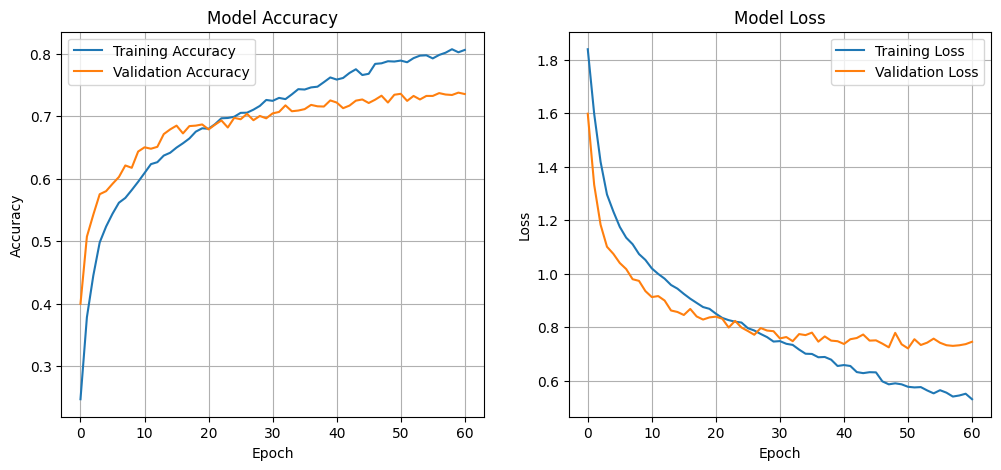

In [108]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## Prediction

In [202]:
# same function which we use earlier

def extract_all_features(file_path, sr=22050, n_mfcc=40, max_len=300):
    try:
        y, _ = librosa.load(file_path, sr=sr)

        # Skip empty or silent audio
        if y is None or len(y) < 2048 or np.max(np.abs(y)) < 1e-4:
            print(f"Skipped invalid or silent file: {file_path}")
            return np.zeros((max_len, n_mfcc + 12 + 1 + 1))

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)

            # Feature extraction
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T
            chroma = librosa.feature.chroma_stft(y=y, sr=sr).T
            zcr = librosa.feature.zero_crossing_rate(y).T
            rms = librosa.feature.rms(y=y).T

        # Make sure all features have the same time steps
        min_len = min(len(mfccs), len(chroma), len(zcr), len(rms))
        mfccs = mfccs[:min_len]
        chroma = chroma[:min_len]
        zcr = zcr[:min_len]
        rms = rms[:min_len]

        combined = np.hstack([mfccs, chroma, zcr, rms])

        # Pad or truncate to fixed length
        if combined.shape[0] < max_len:
            pad_width = max_len - combined.shape[0]
            combined = np.pad(combined, ((0, pad_width), (0, 0)), mode='constant')
        else:
            combined = combined[:max_len]

        return combined

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return np.zeros((max_len, n_mfcc + 12 + 1 + 1))  # Return zero-padded sequence

In [94]:
def predict_emotion(audio_path, model, encoder, scaler):

    # Extract features
    features = extract_all_features(audio_path, max_len=300)

    features = np.array(features)

    # If shape is (300, 54), reshape to (1, 300, 54) for prediction
    if features.ndim == 2:
        # Scale each frame (axis=0) using scaler
        features_flat = features.reshape(-1, features.shape[-1])  # (300, 54)
        features_scaled = scaler.transform(features_flat)

        # Reshape back to model input shape
        features_scaled = features_scaled.reshape(1, features.shape[0], features.shape[1])
    else:
        raise ValueError(f"Expected 2D features (300, 54), got shape: {features.shape}")

    # Predict
    prediction = model.predict(features_scaled)
    predicted_index = np.argmax(prediction)
    predicted_label = encoder.categories_[0][predicted_index]

    return predicted_label

In [95]:
audio_path = "/content/tess/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Predicted Emotion: fear


In [97]:
audio_path = "/content/tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Emotion: angry


In [98]:
audio_path = "/content/crema/AudioWAV/1001_DFA_FEA_XX.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Emotion: fear


In [99]:
audio_path = "/content/savee/ALL/DC_a01.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Emotion: angry


In [100]:
audio_path = "/content/savee/ALL/DC_h04.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Emotion: happy


In [101]:
audio_path = "/content/savee/ALL/DC_n14.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Emotion: neutral


In [102]:
audio_path = "/content/tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_back_disgust.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Emotion: disgust


In [103]:
audio_path = "/content/tess/TESS Toronto emotional speech set data/OAF_Sad/OAF_back_sad.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Emotion: sad


In [113]:
audio_path = "/content/savee/ALL/DC_sa06.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Emotion: sad


In [115]:
audio_path = "/content/savee/ALL/DC_h15.wav"

emotion = predict_emotion(audio_path, model, encoder, scaler)

print(f"Predicted Emotion: {emotion}")

data, sr = librosa.load(audio_path)
Audio(data, rate=sr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Emotion: happy
